## Observations and Insights 

In [148]:
#Observations:
#1 - from the box plots: 'Capomulin', 'Ramicane' are the more effective (smaller tumor sizes) of the treatments. 
# I am curious about Infubinol the 3rd lowest min tumor volume but higher variance.  Is there an interaction we can learn from? 
#2 - there was only one outlier.  Not sure how to evaluate this.  No one had any conditions/interactions of great variation.
#3 - For the Capomulin regimen: the tumor mass increased with the mouse weight.  Not sure this isn't reinforcing?  the tumor mass driving the weight gain
# but if they are independent, it suggests weight is associated to tuomor mass, which suggests treatment hypotheses.
#4 - It was not clear to me to drop the g989 due to some duplicate records.
#  my first thought was to just drop the duplicate records - classmates told me to do otherwise for more data safety

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns

# # Apply the default theme
# sns.set_theme()

#pd.set_option('display.max_rows', None)

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata.head()

# Combine the data into a single dataset
merge_data_df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')


# Display the data table for preview
merge_data_df.head


<bound method NDFrame.head of      Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898   

In [149]:
# Checking the number of mice.

uni_mice= mouse_metadata['Mouse ID'].unique()              
uni_study= study_results['Mouse ID'].unique()
uni_merge= merge_data_df['Mouse ID'].unique()


uni_mice.sort()
uni_study.sort()
uni_merge.sort()

if uni_mice.all() == uni_study.all():
    print("All mice are same in both data sets")
else:
    print("All mice are NOT the same in both data sets")
    
if uni_mice.all() == uni_merge.all():
    print("All mice are same in both data sets")
else:
    print("All mice are NOT the same in both data sets")
    

All mice are same in both data sets
All mice are same in both data sets


In [150]:
# Checking the number of mice.
len(uni_merge)

249

In [151]:
# of records in merged file
len(merge_data_df)

1893

In [152]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

dup_rows = merge_data_df[merge_data_df.duplicated(subset=(['Mouse ID','Timepoint']),keep=False)]

len(merge_data_df)




1893

In [153]:
# Optional: Get all the data for the duplicate mouse ID. 

dup_rows


Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392                 0  
912           51.745156                 0  
913           49.880528                 0  
914           51.325852                 1  
915           53.442020                 0  
916           55.326122                 1  
917           54.657650                 1

In [154]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean = merge_data_df[merge_data_df['Mouse ID'] != 'g989']

clean.head()


Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

In [155]:
# Checking the number of mice in the clean DataFrame.
len(clean)

#length of dataframe dropped from 1893 rows to 1880 rows after cleaning the data

1880

In [156]:
# of mice post cleaning
clean['Mouse ID'].nunique()

248

## Summary Statistics

In [157]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_table = clean.groupby('Drug Regimen')

drug_min = drug_table['Tumor Volume (mm3)'].min()
drug_max = drug_table['Tumor Volume (mm3)'].max()
drug_mean = drug_table['Tumor Volume (mm3)'].mean()
drug_median = drug_table['Tumor Volume (mm3)'].median()
drug_var = drug_table['Tumor Volume (mm3)'].var()
drug_std = drug_table['Tumor Volume (mm3)'].std()
drug_sem = drug_table['Tumor Volume (mm3)'].sem()
mice_tot = drug_table['Mouse ID'].nunique()

#drug_mean, drug_median, drug_var, drug_std,drug_sem

In [158]:
# This method is the most straighforward, creating multiple series and putting them all together at the end.

drug_res_table = {
    'Tumor Volume Min' : drug_min,
    'Tumor Volume Max' : drug_max,
    'Tumor Volume Mean' : drug_mean,
    'Tumor Volume Median' : drug_median,
    'Tumor Volume Var' : drug_var,
    'Tumor Volume St Dev' : drug_std,
    'Tumor Volume SEM' : drug_sem,
    "Mice qty": mice_tot
}



In [159]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function


drug_res_table= pd.DataFrame(drug_res_table)
drug_res_table


Tumor Volume Min  Tumor Volume Max  Tumor Volume Mean  \
Drug Regimen                                                          
Capomulin            23.343598         48.158209          40.675741   
Ceftamin             45.000000         68.923185          52.591172   
Infubinol            36.321346         72.226731          52.884795   
Ketapril             45.000000         78.567014          55.235638   
Naftisol             45.000000         76.668817          54.331565   
Placebo              45.000000         73.212939          54.033581   
Propriva             45.000000         72.455421          52.320930   
Ramicane             22.050126         47.622816          40.216745   
Stelasyn             45.000000         75.123690          54.233149   
Zoniferol            45.000000         73.324432          53.236507   

              Tumor Volume Median  Tumor Volume Var  Tumor Volume St Dev  \
Drug Regimen                                                               
Capomulin               41.557809         24.947764             4.994774   
Ceftamin                51.776157         39.290177             6.268188   
Infubinol               51.820584         43.128684             6.567243   
Ketapril                53.698743         68.553577             8.279709   
Naftisol                52.509285         66.173479             8.134708   
Placebo                 52.288934         61.168083             7.821003   
Propriva                50.446266         43.852013             6.622085   
Ramicane                40.673236         23.486704             4.846308   
Stelasyn                52.431737         59.450562             7.710419   
Zoniferol               51.818479         48.533355             6.966589   

              Tumor Volume SEM  Mice qty  
Drug Regimen                              
Capomulin             0.329346        25  
Ceftamin              0.469821        25  
Infubinol             0.492236        25  
Ketapril              0.603860        25  
Naftisol              0.596466        25  
Placebo               0.581331        25  
Propriva              0.544332        24  
Ramicane              0.320955        25  
Stelasyn              0.573111        24  
Zoniferol             0.516398        25

In [160]:
# the basic describe function appplied to the whole table
drug_res_table.describe()

Tumor Volume Min  Tumor Volume Max  Tumor Volume Mean  \
count         10.000000         10.000000          10.000000   
mean          39.671507         68.628325          50.975982   
std            9.351691         11.237972           5.621289   
min           22.050126         47.622816          40.216745   
25%           38.491009         69.749071          52.388490   
50%           45.000000         72.834180          53.060651   
75%           45.000000         74.673875          54.183257   
max           45.000000         78.567014          55.235638   

       Tumor Volume Median  Tumor Volume Var  Tumor Volume St Dev  \
count            10.000000         10.000000            10.000000   
mean             49.902123         47.858440             6.821103   
std               4.705415         16.008423             1.216096   
min              40.673236         23.486704             4.846308   
25%              50.778739         40.249804             6.342952   
50%              51.819532         46.192684             6.794337   
75%              52.396036         60.738703             7.793357   
max              53.698743         68.553577             8.279709   

       Tumor Volume SEM   Mice qty  
count         10.000000  10.000000  
mean           0.502785  24.800000  
std            0.103473   0.421637  
min            0.320955  24.000000  
25%            0.475424  25.000000  
50%            0.530365  25.000000  
75%            0.579276  25.000000  
max            0.603860  25.000000

## Bar and Pie Charts

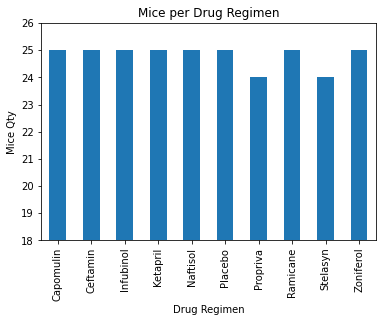

In [161]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

drugs = drug_res_table.index
mice = drug_res_table['Mice qty']


bar_table = pd.DataFrame({ "Drugs": drugs, "Mice Qty": mice})

bar_table.plot.bar(ylim = (18,26), ylabel= ('Mice Qty'), title = "Mice per Drug Regimen", legend = False)

#drug_res_table.plot.bar()

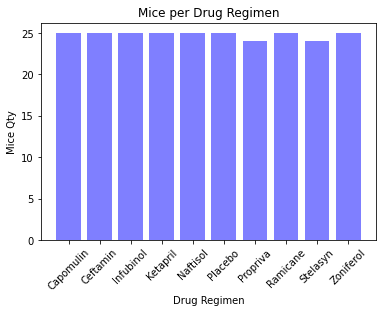

In [162]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

x_axis = drug_res_table.index
y_axis = mice

plt.bar(x_axis, y_axis, color='b', alpha = 0.5, align='center')

plt.xlabel('Drug Regimen')
plt.xticks(x_axis, rotation=45)
plt.ylabel('Mice Qty')
plt.title("Mice per Drug Regimen")

plt.show()


In [163]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_gender =clean.groupby(['Sex']).nunique()
mice_gender



Mouse ID  Drug Regimen  Age_months  Weight (g)  Timepoint  \
Sex                                                                 
Female       123            10          24          14         10   
Male         125            10          24          14         10   

        Tumor Volume (mm3)  Metastatic Sites  
Sex                                           
Female                 800                 5  
Male                   834                 5

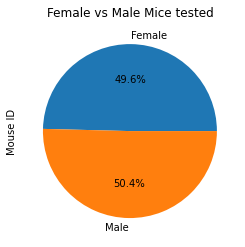

In [164]:
mice_gender['Mouse ID'].plot.pie( autopct = "%1.1f%%", title ="Female vs Male Mice tested")
plt.show()

C:\Users\wavau\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  # This is added back by InteractiveShellApp.init_path()


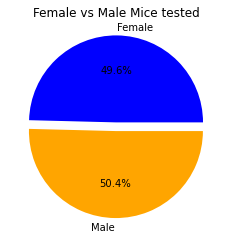

In [165]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

mice_gender_revised = mice_gender.drop(columns=['Drug Regimen','Age_months','Weight (g)','Timepoint','Tumor Volume (mm3)','Metastatic Sites'])

mice_gender_revised

labels=['Female','Male']
colors=['blue', 'orange']
explode = (0.1, 0)
 
plt.pie(mice_gender_revised, labels=labels, colors=colors, autopct = "%1.1f%%", explode = explode)


plt.title("Female vs Male Mice tested")
plt.show()

## Quartiles, Outliers and Boxplots

In [166]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin



filter_drug = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

clean_tab = clean.loc[(clean['Drug Regimen'] == 'Capomulin') | (clean['Drug Regimen'] == 'Ramicane') |(clean['Drug Regimen'] == 'Infubinol') |(clean['Drug Regimen'] == 'Ceftamin')]

#new_df = clean[clean["Drug Regimen"].isin(filter_drug)]


print(type(clean_tab ))

clean_tab.head()

# len(clean_tab )

<class 'pandas.core.frame.DataFrame'>


Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

In [167]:
# make a new table with groupby function by the Mouse ID
mouse_table = clean_tab.groupby(['Mouse ID'])



# mouse_unique = new_df["Mouse ID"].nunique()
# mouse_unique

mouse_table.head()

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane    Male          21          16          0   
1        k403     Ramicane    Male          21          16          5   
2        k403     Ramicane    Male          21          16         10   
3        k403     Ramicane    Male          21          16         15   
4        k403     Ramicane    Male          21          16         20   
...       ...          ...     ...         ...         ...        ...   
1863     z581    Infubinol  Female          24          25          0   
1864     z581    Infubinol  Female          24          25          5   
1865     z581    Infubinol  Female          24          25         10   
1866     z581    Infubinol  Female          24          25         15   
1867     z581    Infubinol  Female          24          25         20   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2              35.014271                 1  
3              34.223992                 1  
4              32.997729                 1  
...                  ...               ...  
1863           45.000000                 0  
1864           49.273092                 1  
1865           50.478750                 2  
1866           51.196304                 2  
1867           51.807944                 2  

[458 rows x 8 columns]

In [168]:
# Start by getting the last (greatest) timepoint for each mouse

max_size = []
mouse_name = []
drug_treat = []

max_size = mouse_table['Timepoint'].max()

print(type(max_size))
max_size


<class 'pandas.core.series.Series'>


Mouse ID
a203    45
a251    45
a275    45
a411    45
a444    45
        ..
y769    45
y793    45
y865    45
z578    45
z581    45
Name: Timepoint, Length: 100, dtype: int64

In [169]:
# add the series of Max Timepoint back into the clean table, NOT the groupby object

clean_tab  = clean_tab.merge(max_size, on='Mouse ID')

clean_tab.head()

# len(mouse_table)

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint_x  \
0     k403     Ramicane  Male          21          16            0   
1     k403     Ramicane  Male          21          16            5   
2     k403     Ramicane  Male          21          16           10   
3     k403     Ramicane  Male          21          16           15   
4     k403     Ramicane  Male          21          16           20   

   Tumor Volume (mm3)  Metastatic Sites  Timepoint_y  
0           45.000000                 0           45  
1           38.825898                 0           45  
2           35.014271                 1           45  
3           34.223992                 1           45  
4           32.997729                 1           45

In [170]:
# create a new working table with the tumor size at time = max time

tum_max_tab = clean_tab.loc[clean_tab['Timepoint_x']==clean_tab['Timepoint_y']]

tum_max_tab.head()



Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint_x  \
9      k403     Ramicane    Male          21          16           45   
19     s185    Capomulin  Female           3          17           45   
29     x401    Capomulin  Female          16          15           45   
39     m601    Capomulin    Male          22          17           45   
49     g791     Ramicane    Male          11          16           45   

    Tumor Volume (mm3)  Metastatic Sites  Timepoint_y  
9            22.050126                 1           45  
19           23.343598                 1           45  
29           28.484033                 0           45  
39           28.430964                 1           45  
49           29.128472                 1           45

In [171]:
# Put treatments into a list for for loop (and later for plot labels)
# I did this in a prior step  list filter_drug = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_ram=[]
tumor_vol_cap=[]
tumor_vol_inf=[]
tumor_vol_cef=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# need to get IQR values per mouse, per drug type, per max time

#CREATE TABLES per specified drug

ram_table = tum_max_tab.loc[(tum_max_tab['Drug Regimen'] == 'Ramicane')]
cap_table = tum_max_tab.loc[(tum_max_tab['Drug Regimen'] == 'Capomulin')]
inf_table = tum_max_tab.loc[(tum_max_tab['Drug Regimen'] == 'Infubinol')]
cef_table = tum_max_tab.loc[(tum_max_tab['Drug Regimen'] == 'Ceftamin')]

#check number of mice per drug treatment, 25 each drug
print(len(ram_table), len(cap_table), len(inf_table), len(cef_table))    
    
    
# create new table of tumor volumes per drug type                                
tumor_vol_ram=ram_table['Tumor Volume (mm3)']    
tumor_vol_cap=cap_table['Tumor Volume (mm3)']
tumor_vol_inf=inf_table['Tumor Volume (mm3)']
tumor_vol_cef=cef_table['Tumor Volume (mm3)']                                          
                                      
print(type(tumor_vol_inf))


25 25 25 25
<class 'pandas.core.series.Series'>


In [172]:
# Determine outliers using upper and lower bounds per drug type
#find quartiles
ram_quartiles=tumor_vol_ram.quantile([0.25,0.5,0.75])     
cap_quartiles=tumor_vol_cap.quantile([0.25,0.5,0.75]) 
inf_quartiles=tumor_vol_inf.quantile([0.25,0.5,0.75])
cef_quartiles=tumor_vol_cef.quantile([0.25,0.5,0.75])

#determine IQR
ram_IQR = float(ram_quartiles[0.75])-float(ram_quartiles[0.25])
cap_IQR = float(cap_quartiles[0.75])-float(cap_quartiles[0.25])
inf_IQR = float(inf_quartiles[0.75])-float(inf_quartiles[0.25])
cef_IQR = float(cef_quartiles[0.75])-float(cef_quartiles[0.25])

# deterine outlier bounds per drug type
upper_ram = (1.5*ram_IQR)+ram_quartiles[0.75]
lower_ram = (-1.5*ram_IQR)+ram_quartiles[0.25]

upper_cap = (1.5*cap_IQR)+cap_quartiles[0.75]
lower_cap = (-1.5*cap_IQR)+cap_quartiles[0.25]

upper_inf = (1.5*inf_IQR)+inf_quartiles[0.75]
lower_inf = (-1.5*inf_IQR)+inf_quartiles[0.25]

upper_cef = (1.5*cef_IQR)+cef_quartiles[0.75]
lower_cef = (-1.5*cef_IQR)+cef_quartiles[0.25]

ram_IQR, upper_ram, lower_ram, ram_quartiles[0.25], ram_quartiles[0.75]

(9.098536719999998, 54.30681135, 17.912664470000003, 31.56046955, 40.65900627)

In [173]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# OUTLIERS
for num in tumor_vol_ram:
    updated_ram = tumor_vol_ram.loc[(tumor_vol_ram < lower_ram)|(tumor_vol_ram > upper_ram)]

for num in tumor_vol_cap:
    updated_cap = tumor_vol_cap.loc[(tumor_vol_cap < lower_cap)|(tumor_vol_cap > upper_cap)]
    
for num in tumor_vol_inf:
    updated_inf = tumor_vol_inf.loc[(tumor_vol_inf < lower_inf)|(tumor_vol_inf > upper_inf)]

for num in tumor_vol_cef:
    updated_cef = tumor_vol_cef.loc[(tumor_vol_cef < lower_cef)|(tumor_vol_cef > upper_cef)]    
    
#cap_IQR, cap_quartiles[0.75], cap_quartiles[0.25], upper_cap, lower_cap   
#inf_IQR, inf_quartiles[0.75], inf_quartiles[0.25], upper_inf, lower_inf   
#cef_IQR, cef_quartiles[0.75], cef_quartiles[0.25], upper_cef, lower_cef 

updated_ram, updated_cap, updated_inf, updated_cef

(Series([], Name: Tumor Volume (mm3), dtype: float64),
 Series([], Name: Tumor Volume (mm3), dtype: float64),
 526    36.321346
 Name: Tumor Volume (mm3), dtype: float64,
 Series([], Name: Tumor Volume (mm3), dtype: float64))

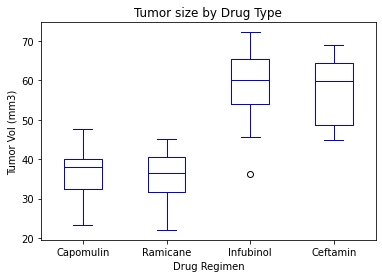

In [174]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

drug_table= { 'Capomulin':tumor_vol_cap , 'Ramicane':tumor_vol_ram, 'Infubinol':tumor_vol_inf, 'Ceftamin':tumor_vol_cef}

drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

drug_table_df = pd.DataFrame(drug_table)
ax = drug_table_df.boxplot(grid =False, color=('b'))


# example of box plot from stack overflow - https://stackoverflow.com/questions/42406233/how-to-add-title-to-seaborn-boxplot
#ax = drug_table_df.boxplot(grid =False)

ax.set_title('Tumor size by Drug Type')
ax.set_ylabel('Tumor Vol (mm3)')
ax.set_xlabel('Drug Regimen')

plt.show()


In [175]:
# # trying to blox plot with seaborn  ref:https://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn.boxplot

# tips=sns.load_dataset(drug_table_df)

# #ax = sns.boxplot(data = tips)

## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
cap_tab= clean_tab.loc[clean_tab['Drug Regimen'] == 'Capomulin']

line_plot_df = cap_tab[['Mouse ID','Timepoint_x', 'Tumor Volume (mm3)']]
line_plot_df = line_plot_df[(cap_tab['Mouse ID'] =='s185')]

ax = line_plot_df.plot.line(x='Timepoint_x', y='Tumor Volume (mm3)')

ax.set_title('Tumor change vs. Time (sample - S185)')
ax.set_ylabel('Tumor Vol (mm3)')
ax.set_xlabel('Time Point')


In [ ]:
cap_table


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# I don't understand plotting against a constant value (ave tumor volume) for a scatter plot
# I will plot the weight vs. tumor volume by mouse with the capomulin regiman

ave_cap_tumor = (tumor_vol_cap.mean())
ave_cap_tumor

cap_table

ax = weight.plot.scatter(x = 'Weight (g)', y = 'Tumor Volume (mm3)')
ax.set_title('ScatterPlot: Weight vs. Tumor volume (mm3)')
ax.set_ylabel('Tumor Vol (mm3)')
ax.set_xlabel('Weight')



## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation= st.pearsonr(cap_table['Weight (g)'],cap_table['Tumor Volume (mm3)'] )
cor_coef = correlation[0]

print(f" Correlation: {format('{:.2f}')}".format(cor_coef))

In [ ]:
# linear regression model
from scipy.stats import linregress

In [ ]:
result  = linregress((cap_table['Weight (g)'], cap_table['Tumor Volume (mm3)']))

In [ ]:
slope = result.slope
print(type(slope))
yinter = result.intercept

In [998]:
line_eq = print(f"Regression eq: Y = {format('{:.2f}')}x + {format('{:.2f}')}".format(slope,yinter))
#print(line_eq)

short_form = f"Y = {format('{:.2f}')}x + {format('{:.2f}')}".format(slope,yinter)


Regression eq: Y = 1.75x + 1.45


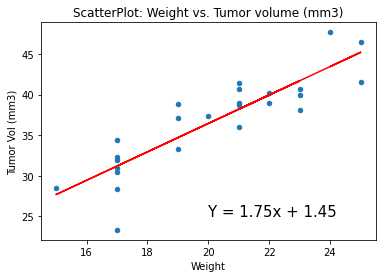

In [1000]:
#plotting the chart with the regression line and equation (mouse weight vs. turmor volue)
ax = weight.plot.scatter(x = 'Weight (g)', y = 'Tumor Volume (mm3)')

ax.set_title('ScatterPlot: Weight vs. Tumor volume (mm3)')
ax.set_ylabel('Tumor Vol (mm3)')
ax.set_xlabel('Weight')

ax.annotate(short_form, xy=(20,25), xytext=(20,25), fontsize=15)

x_values = cap_table['Weight (g)']
y_values = cap_table['Weight (g)']*slope + yinter

plt.plot(x_values, y_values, color='r')

plt.show()